In [1]:
import os, sys
parent_dir = os.path.realpath('..')
sys.path.append(parent_dir)  # parent directory path adding

In [2]:
import pandas as pd
import numpy as np
import logging
import json

import torch
from torch.utils.data import DataLoader
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter

from src.libs.dataset_utils import SinDataset
from src.data.trigonometric.trigonometric_dataset import *
from src.models.sin_lstm.sin_LSTM import SinLSTM
from src.libs.train_valid_test_utils import TrainValidEvaluate
from src.libs.visualize_utils import VisualizeUtils

In [3]:
import sys

print(sys.executable)

/Users/a12319/Library/Caches/pypoetry/virtualenvs/accidentdetection-lv2-hpzFbqIc-py3.10/bin/python


In [7]:
device = 'cpu'
model_name = 'sin2cos_lstm'
hidden_dim1 = 100
batch_size = 16
num_layers = 2
sin_data_number = 1000
sin_data_interval = 20
data_sequence_length = 10
learning_rate = 1e-3
device = 'cpu'

# Generate Data

In [8]:
save_name = f"{model_name}_hd1_{hidden_dim1}_nl_{num_layers}_lr_{learning_rate}"
save_dir = f"{parent_dir}/models/{model_name}"
save_path = f"{parent_dir}/models/{model_name}/{save_name}.pth"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [9]:
print(save_name)
print(save_dir)
print(save_path)

sin2cos_lstm_hd1_100_nl_2_lr_0.001
/Users/a12319/PycharmProjects/accidentdetection_lv2/models/sin2cos_lstm
/Users/a12319/PycharmProjects/accidentdetection_lv2/models/sin2cos_lstm/sin2cos_lstm_hd1_100_nl_2_lr_0.001.pth


In [10]:
total_data = generate_cos_to_sin_data(
    d_num=sin_data_number,
    data_interval=sin_data_interval,
    data_sequence=data_sequence_length
)

In [11]:
train_dataset = SinDataset(total_data=total_data, data_type='train')
valid_dataset = SinDataset(total_data=total_data, data_type='valid')
test_dataset = SinDataset(total_data=total_data, data_type='test')

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=batch_size)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size)

# Modeling

In [12]:
lstm_input_dim = len(train_dataset[0][1][-1])

In [13]:
model = SinLSTM(input_dim=lstm_input_dim, lstm_hidden_dim=hidden_dim1, num_layers=num_layers).to(device)

# Training

In [15]:
weight_decay = 1e-6
n_epochs = 200

In [16]:
optimizer = torch.optim.Adam(model.parameters(),
                             lr=learning_rate,
                             weight_decay=weight_decay)

In [17]:
criterion = nn.MSELoss()

In [18]:
train_valid_evaluate = TrainValidEvaluate(
    model=model,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    n_epochs=n_epochs,
    optimizer=optimizer,
    criterion=criterion,
    device=device,
    path=save_path,
    logging=logging,
)

In [19]:
train_valid_evaluate.sin_train()

50it [00:00, 159.46it/s]
50it [00:00, 179.04it/s]
50it [00:00, 180.00it/s]
50it [00:00, 179.11it/s]
50it [00:00, 179.32it/s]
50it [00:00, 178.16it/s]
50it [00:00, 180.22it/s]
50it [00:00, 177.24it/s]
50it [00:00, 179.05it/s]
50it [00:00, 181.76it/s]
50it [00:00, 179.54it/s]
50it [00:00, 175.73it/s]
50it [00:00, 180.29it/s]
50it [00:00, 178.82it/s]
50it [00:00, 177.05it/s]
50it [00:00, 179.14it/s]
50it [00:00, 176.48it/s]
50it [00:00, 177.34it/s]
50it [00:00, 180.09it/s]
50it [00:00, 179.66it/s]
50it [00:00, 179.49it/s]
50it [00:00, 178.69it/s]
50it [00:00, 180.71it/s]
50it [00:00, 179.95it/s]
50it [00:00, 179.40it/s]
50it [00:00, 179.62it/s]
50it [00:00, 178.71it/s]
50it [00:00, 181.56it/s]
50it [00:00, 177.36it/s]
50it [00:00, 179.24it/s]
50it [00:00, 179.72it/s]
50it [00:00, 180.71it/s]
50it [00:00, 169.09it/s]
50it [00:00, 169.91it/s]
50it [00:00, 171.31it/s]
50it [00:00, 172.41it/s]
50it [00:00, 176.52it/s]
50it [00:00, 175.71it/s]
50it [00:00, 177.75it/s]
50it [00:00, 179.03it/s]


In [20]:
loss, mape, pred, targ = train_valid_evaluate.sin_test()

In [21]:
print(f'TEST SCORE :: \n \ttest MAPE={train_valid_evaluate.avg_test_mape:.4f} \n\ttest loss={train_valid_evaluate.avg_test_loss:.4f}')

TEST SCORE :: 
 	test MAPE=0.1610 
	test loss=0.0290


# Visualize

In [22]:
visualize_util = VisualizeUtils(predict_value=train_valid_evaluate.test_prediction_result,
                                true_value=train_valid_evaluate.test_target_result,
                                data_interval=sin_data_interval)

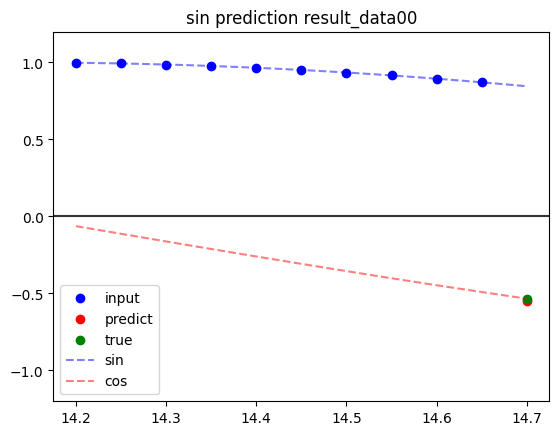

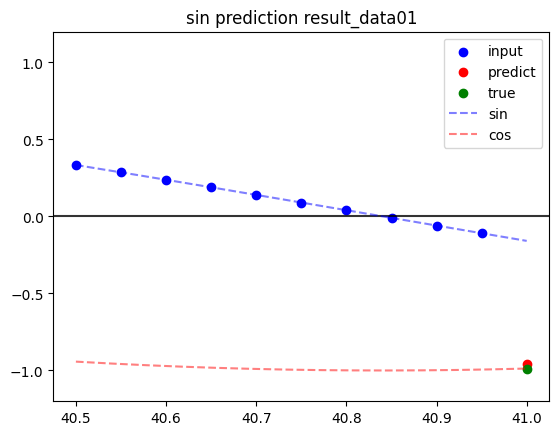

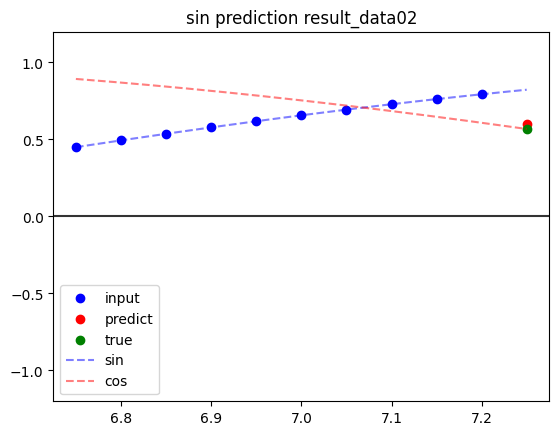

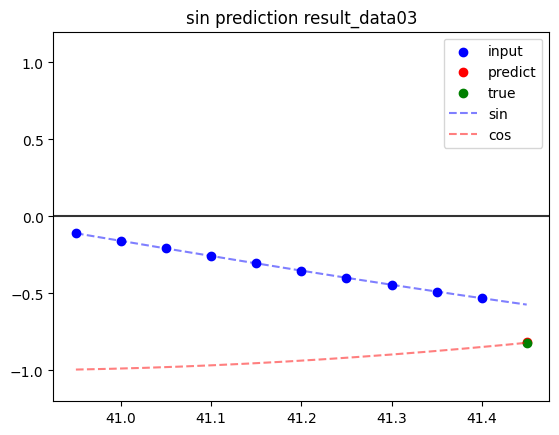

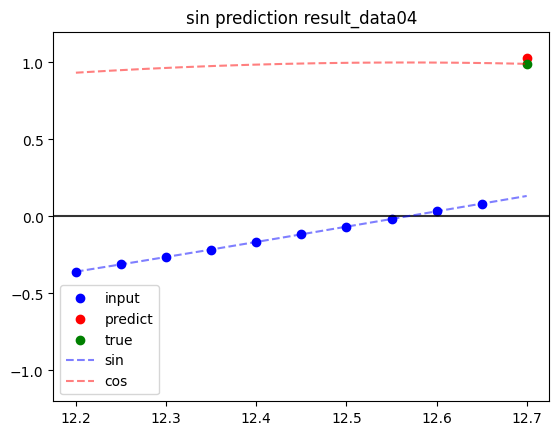

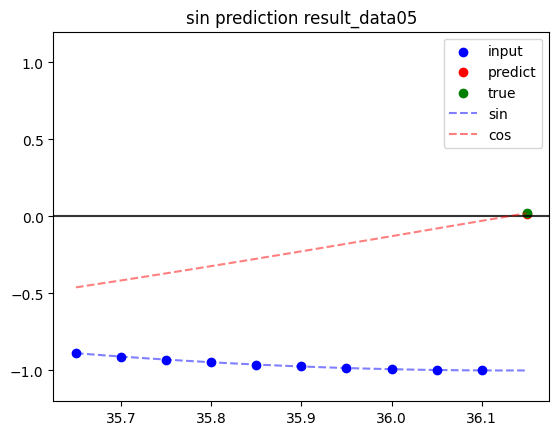

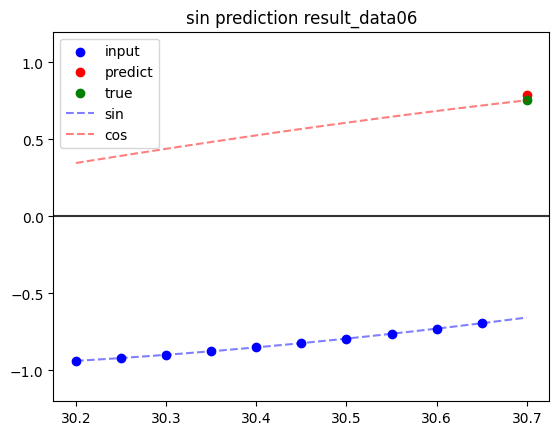

In [23]:
visualize_util.visualize_sin2cos_data('sin prediction result')